<a href="https://colab.research.google.com/github/pollynqa/Internship/blob/main/CNN%20Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
(x_train,y_train), (x_test,y_test) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
x_train=x_train/255
x_test=x_test/255

In [8]:
model=Sequential()

In [12]:
model.add(Conv2D(32,(3,3),
activation='relu',
input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(MaxPool2D(2,2))

In [14]:
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))

In [15]:
model.add(Dense(10,activation = 'softmax'))

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
training=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9995 - loss: 0.0013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9992 - loss: 0.0022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9994 - loss: 0.0015
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9994 - loss: 0.0016
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9996 - loss: 0.0015
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9998 - loss: 5.9311e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9996 - loss: 0.0010
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9993 - loss: 0.0016
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9999 - loss: 4.5111e-04
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9994 - loss: 0.0019


In [18]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9847 - loss: 0.0628


[0.05338505282998085, 0.9872000217437744]

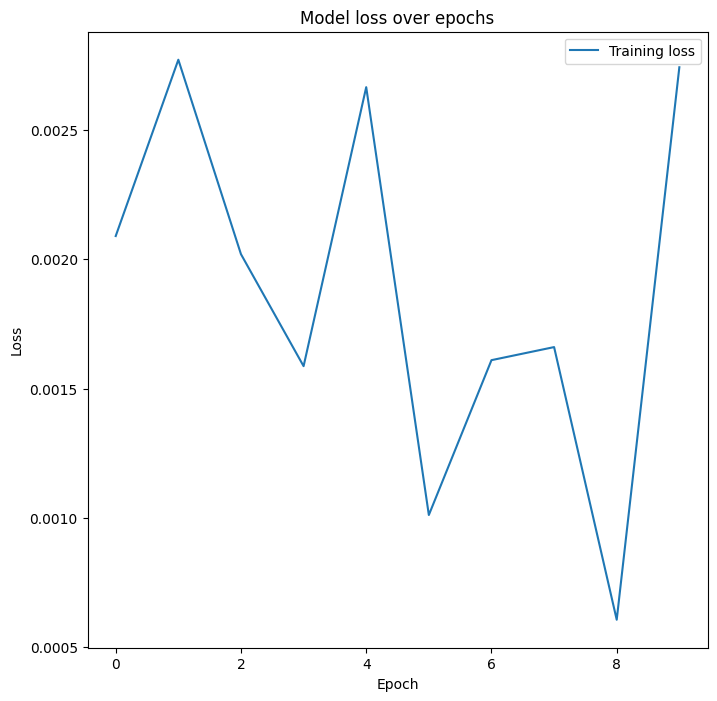

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(training.history['loss'],label='Training loss')
plt.title('Model loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()



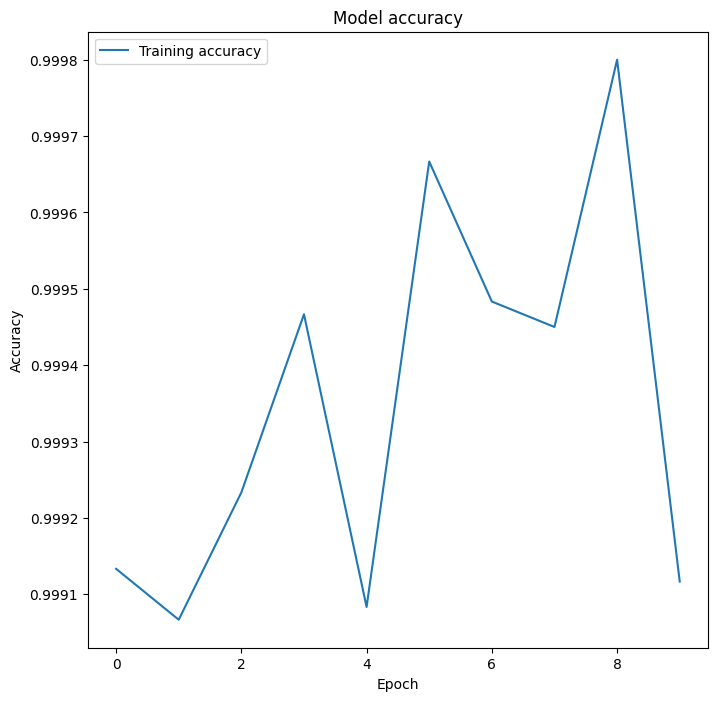

In [53]:
plt.figure(figsize=(8,8))
plt.plot(training.history['accuracy'],label='Training accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


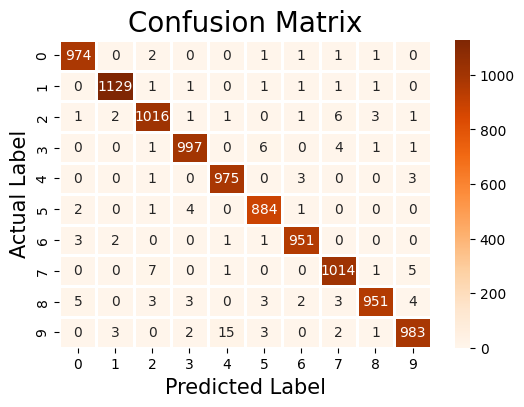

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred=model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, linecolor='white', cmap='Oranges',linewidths=1,annot=True,fmt='')
plt.title('Confusion Matrix',size=20)
plt.xlabel('Predicted Label',size=15)
plt.ylabel('Actual Label',size=15)
plt.show()